# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

## Attribute information:
    
##### Some of the  Independent Variables
- Age (numeric)

- Sex (text: male, female)

- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

- Housing (text: own, rent, or free)

- Saving accounts (text - little, moderate, quite rich, rich)

- Checking account (numeric, in DM - Deutsch Mark)

- Credit amount (numeric, in DM)

- Duration (numeric, in month)

- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

##### Depedent Variable
- Default

# Objective:
    
To Guage Feature Importance

## Environment Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 50)

## Ingest Data

In [2]:
df = pd.read_csv("credit_data.csv")
df.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


## Minimal EDA

In [3]:
df.shape

(1000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [5]:
df.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

#### Non Numeric Data

In [32]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


#### Target Variables

In [47]:
df['default'].value_counts(normalize = True)

0    0.7
1    0.3
Name: default, dtype: float64

## Encode Categorical Data

In [21]:
dff=pd.get_dummies(df, drop_first=True)

In [22]:
dff.shape

(1000, 49)

## Correlations

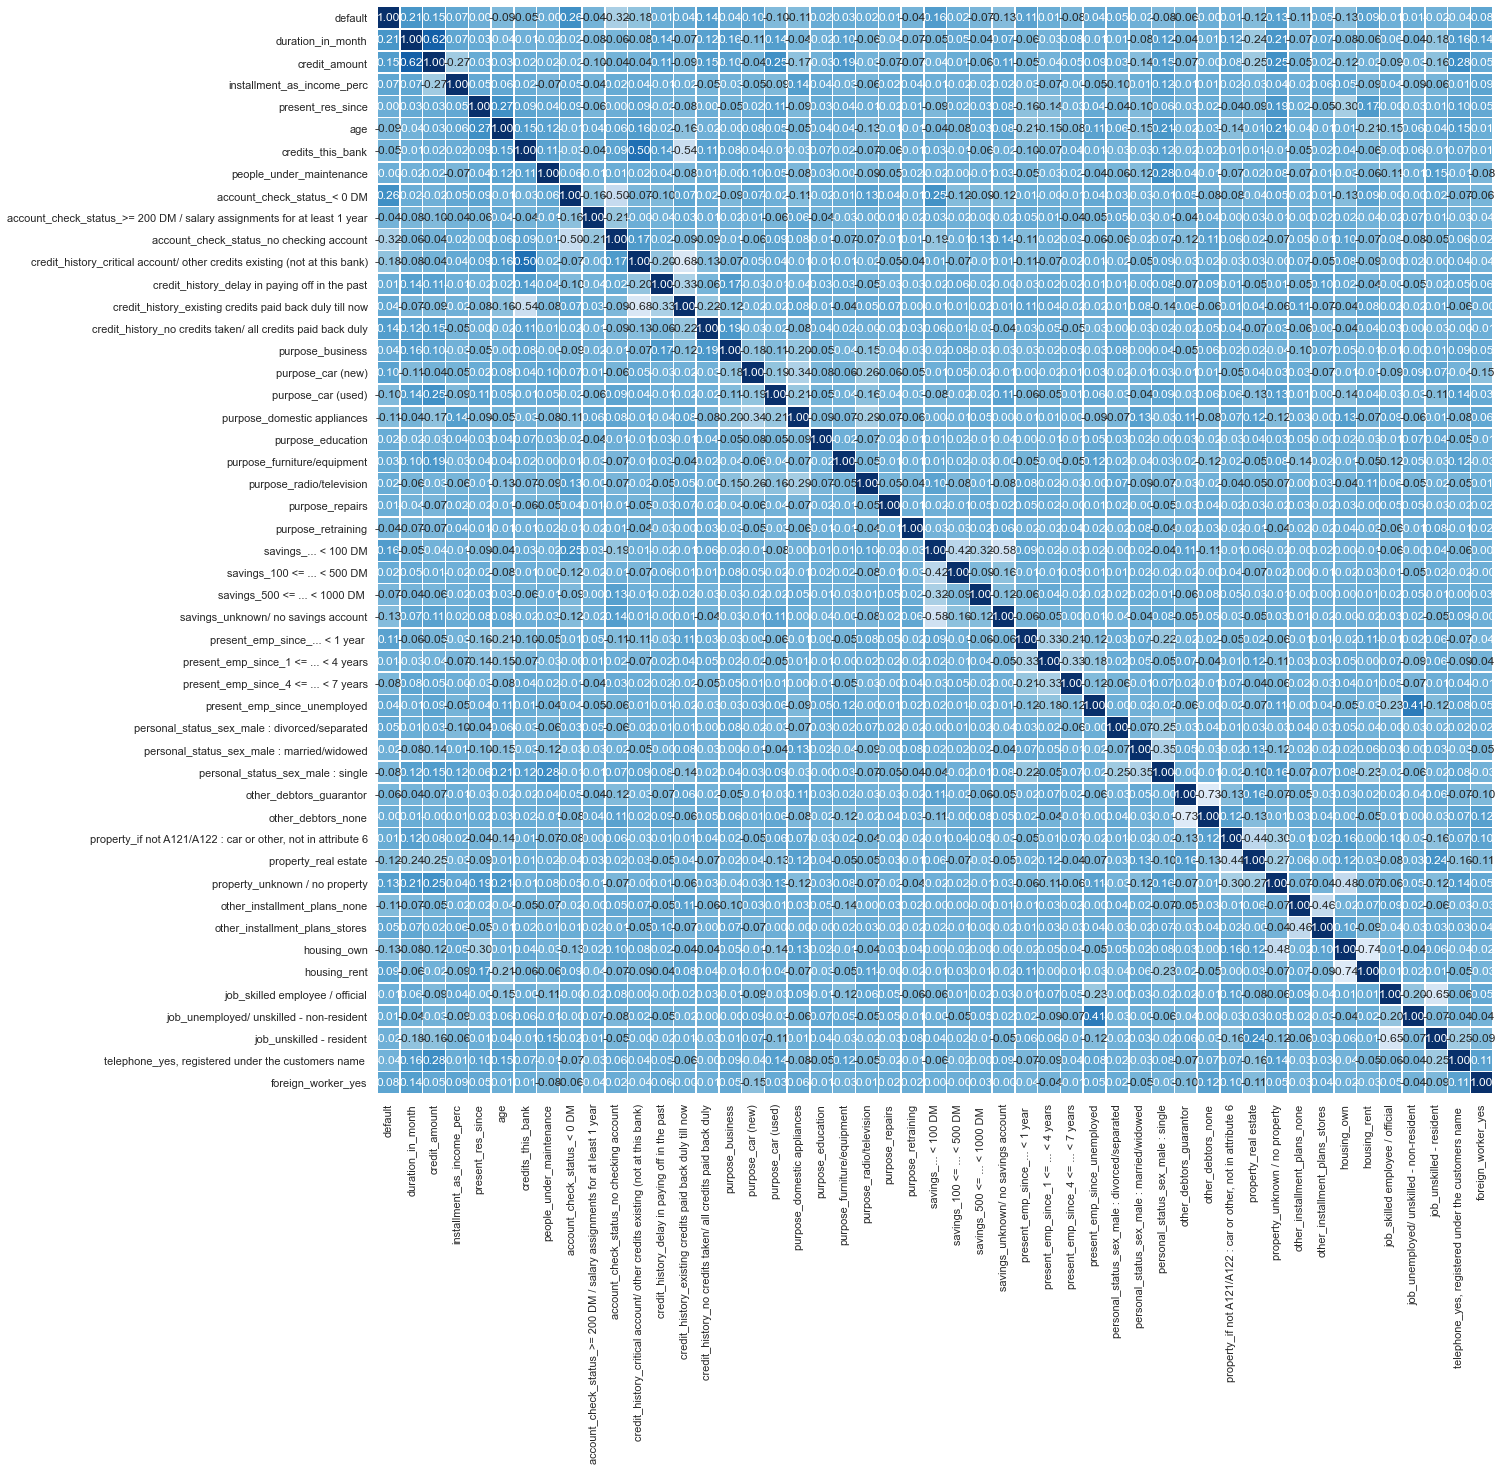

In [27]:
# Lets check for highly correlated variables
cor= dff.corr()

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(cor,
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Blues",
            fmt='0.2f')
plt.show()



**Bit hard to tell from this - lets just see if we have any highly correlated features**

In [30]:
cor.loc[:,:] = np.tril(cor,k=-1) ## Lower triangle of an array
cor=cor.stack()

## Check for highly correlated values
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

## Train Test Split

In [31]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 48), (300, 48), (700,), (300,))

## Build Simple Random Forest

In [169]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,
                            n_estimators=100,
                            criterion="gini",
                            random_state=77)
rfm=rf.fit(X_train, y_train)

#### Predict

In [170]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [171]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
## Function to create confusion matrix
def make_confusion_matrix(y_actual,y_predict):
    cm=confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap = 'Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

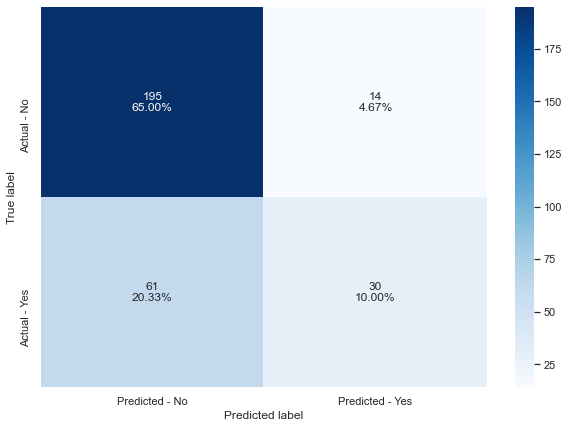

In [172]:
make_confusion_matrix(y_test, y_pred)


In [173]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [174]:
"Train Accuracy:"
(trainResult)

1.0

In [175]:
"Test Accuracy:"
(testResult)

0.75

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [177]:
kfold = KFold(n_splits=10, random_state=77)

In [178]:
results = cross_val_score(rfm, X, y, cv=kfold)
results

array([0.87, 0.71, 0.79, 0.78, 0.77, 0.65, 0.76, 0.78, 0.78, 0.71])

In [179]:
np.mean(abs(results))

0.76

In [180]:
results.std()

0.05603570290448761

#### Example of Kfold with F1 Score (Same logic for precision & recall):
https://stats.stackexchange.com/questions/279856/k-fold-cross-validation-and-f1-score-metric

# Leave One Out cross-validation

In [58]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [59]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [61]:
scores.mean()

0.7442857142857143

In [62]:
scores.std()

0.4362619508917989

# Stratified cross-validation( Bonus)

k-fold cross validation with stratification

https://towardsdatascience.com/stratified-k-fold-what-it-is-how-to-use-it-cf3d107d3ea2

In [181]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [182]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.758
Standard deviation:  0.03815756805667782


# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [183]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [184]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [185]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.743
Standard deviation:  0.014564034849968975


Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.